## **Data Analysis and Visualization**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2 as ps

In [2]:
sns.set_style("whitegrid")
plt.style.use('ggplot')

**Read PostgreSQL Table 'spotify_tracks' as a Pandas Dataframe**

In [3]:
host_name = 'localhost'
dbname = 'spotify_tracks'
port = '5432'
username = 'postgres' 
password = 'password'
conn = None

In [4]:
conn = ps.connect(host=host_name, database=dbname, user=username, password=password, port=port)

In [5]:
sql = "select * from tracks;"
dat = pd.read_sql_query(sql, conn)
conn = None

In [6]:
dat.head()

,track_id,track_title,track_duration_sec,artist,artist_id,genre,artist_popularity,album_name,release_date,album_id,total_tracks,available_markets,album_type,track_popularity
0,7LSINVHqMXPt4FkTgcH6bt,Champagne Poetry,336511.0,Drake,3TVXtAsR1Inumwj472S9r4,canadian hip hop,93,Certified Lover Boy,2021-09-03,6sp02aeyiwfX35xRqwNiPv,21,183,album,39
1,6C62fl8x0vzwxPqay8twie,Papi’s Home,178623.0,Drake,3TVXtAsR1Inumwj472S9r4,canadian hip hop,93,Certified Lover Boy,2021-09-03,6sp02aeyiwfX35xRqwNiPv,21,183,album,35
2,60kRxS2TC4qb2WBPmRmfv4,Girls Want Girls (with Lil Baby),221979.0,Drake,3TVXtAsR1Inumwj472S9r4,canadian hip hop,93,Certified Lover Boy,2021-09-03,6sp02aeyiwfX35xRqwNiPv,21,183,album,49
3,7xXVDIulqmlBvDLFMfc3uX,In The Bible (with Lil Durk & Giveon),296568.0,Drake,3TVXtAsR1Inumwj472S9r4,canadian hip hop,93,Certified Lover Boy,2021-09-03,6sp02aeyiwfX35xRqwNiPv,21,183,album,36
4,7L8V5vHLo6fMbNaVI7rbhU,Love All (with JAY-Z),228461.0,Drake,3TVXtAsR1Inumwj472S9r4,canadian hip hop,93,Certified Lover Boy,2021-09-03,6sp02aeyiwfX35xRqwNiPv,21,183,album,36


In [7]:
dat['artist'].unique()

array(['Drake', 'Young Thug', 'BTS', 'Adele', 'Taylor Swift',
       'Kanye West', 'Mac Miller', 'Ozuna', 'Juice WRLD', 'Doja Cat',
       'Lil Baby', 'The Weeknd', 'J. Cole', 'Morgan Wallen', 'Rod Wave',
       'Billie Eilish', 'DaBaby', 'Pop Smoke', 'Future', 'Eminem',
       'Bad Bunny', 'Ariana Grande', 'Luke Combs', 'Roddy Ricch',
       'Travis Scott', 'XXXTENTACION', 'Justin Bieber', 'Gunna',
       'Lil Wayne', 'Polo G', 'Chris Brown', 'Megan Thee Stallion',
       'Khalid', 'The Beatles', 'Moneybagg Yo', 'Harry Styles',
       'Ed Sheeran', 'Kevin Gates', 'Halsey', 'Lil Durk',
       'Kendrick Lamar', 'Beyoncé', 'Jason Aldean', 'Rihanna',
       'YNW Melly', 'Kodak Black', 'NF', 'Tory Lanez', 'Maroon 5',
       'Lil Peep', 'Kane Brown', 'Dua Lipa', 'Luke Bryan',
       'Imagine Dragons', 'NLE Choppa', 'Lady Gaga', 'Summer Walker',
       '21 Savage', 'Cardi B', 'Queen', 'Meek Mill', 'Thomas Rhett',
       'Florida Georgia Line', 'Frank Ocean', 'Lewis Capaldi',
       'Fleetwoo

In [8]:
dat['artist'].nunique()

97

**Data Exploration**

In [9]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14107 entries, 0 to 14106
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            14107 non-null  object 
 1   track_title         14107 non-null  object 
 2   track_duration_sec  14107 non-null  float64
 3   artist              14107 non-null  object 
 4   artist_id           14107 non-null  object 
 5   genre               14107 non-null  object 
 6   artist_popularity   14107 non-null  int64  
 7   album_name          14107 non-null  object 
 8   release_date        14107 non-null  object 
 9   album_id            14107 non-null  object 
 10  total_tracks        14107 non-null  int64  
 11  available_markets   14107 non-null  int64  
 12  album_type          14107 non-null  object 
 13  track_popularity    14107 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 1.5+ MB


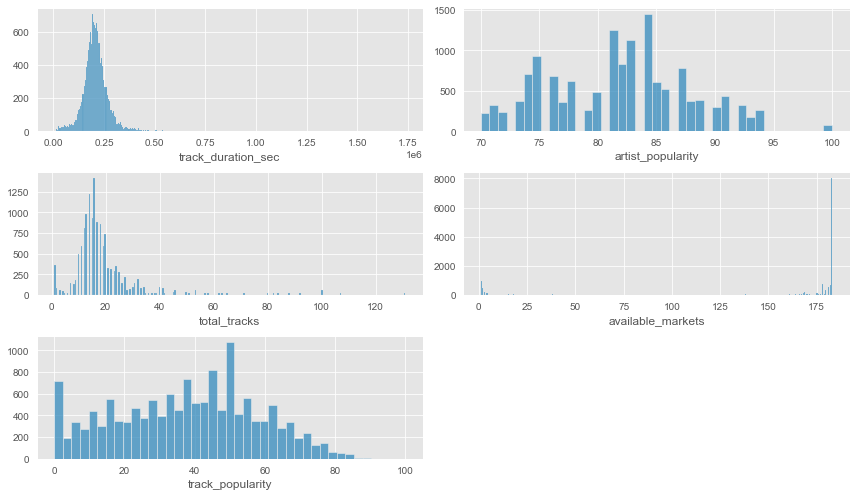

In [10]:
plt.figure(figsize=(12,7))
for i, col in enumerate(['track_duration_sec', 'artist_popularity', 'total_tracks', 'available_markets', 'track_popularity']):
    i += 1
    plt.subplot(3,2,i)
    sns.histplot(data=dat, x=col, legend=False)
    plt.ylabel('')
    plt.tight_layout()

**Analyze Track Duration**

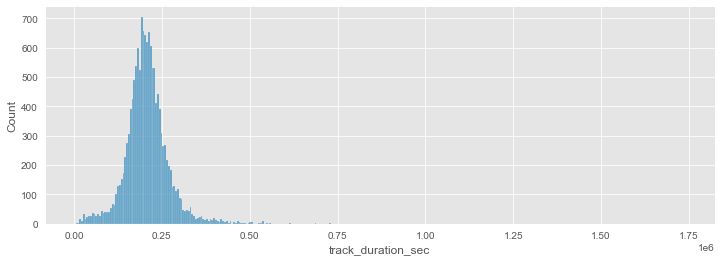

In [11]:
plt.figure(figsize=(12,4))
sns.histplot(data=dat, x='track_duration_sec')
plt.savefig('check')
plt.savefig('duration_histplot')

In [12]:
def convert_sec_to_min(duration_in_sec):
    return round(duration_in_sec/(60*1000),1)

In [13]:
dat['track-duration_min'] = dat['track_duration_sec'].apply(lambda x:convert_sec_to_min(x))

In [14]:
dat.head()

,track_id,track_title,track_duration_sec,artist,artist_id,genre,artist_popularity,album_name,release_date,album_id,total_tracks,available_markets,album_type,track_popularity,track-duration_min
0,7LSINVHqMXPt4FkTgcH6bt,Champagne Poetry,336511.0,Drake,3TVXtAsR1Inumwj472S9r4,canadian hip hop,93,Certified Lover Boy,2021-09-03,6sp02aeyiwfX35xRqwNiPv,21,183,album,39,5.6
1,6C62fl8x0vzwxPqay8twie,Papi’s Home,178623.0,Drake,3TVXtAsR1Inumwj472S9r4,canadian hip hop,93,Certified Lover Boy,2021-09-03,6sp02aeyiwfX35xRqwNiPv,21,183,album,35,3.0
2,60kRxS2TC4qb2WBPmRmfv4,Girls Want Girls (with Lil Baby),221979.0,Drake,3TVXtAsR1Inumwj472S9r4,canadian hip hop,93,Certified Lover Boy,2021-09-03,6sp02aeyiwfX35xRqwNiPv,21,183,album,49,3.7
3,7xXVDIulqmlBvDLFMfc3uX,In The Bible (with Lil Durk & Giveon),296568.0,Drake,3TVXtAsR1Inumwj472S9r4,canadian hip hop,93,Certified Lover Boy,2021-09-03,6sp02aeyiwfX35xRqwNiPv,21,183,album,36,4.9
4,7L8V5vHLo6fMbNaVI7rbhU,Love All (with JAY-Z),228461.0,Drake,3TVXtAsR1Inumwj472S9r4,canadian hip hop,93,Certified Lover Boy,2021-09-03,6sp02aeyiwfX35xRqwNiPv,21,183,album,36,3.8


<AxesSubplot:xlabel='track-duration_min', ylabel='Count'>

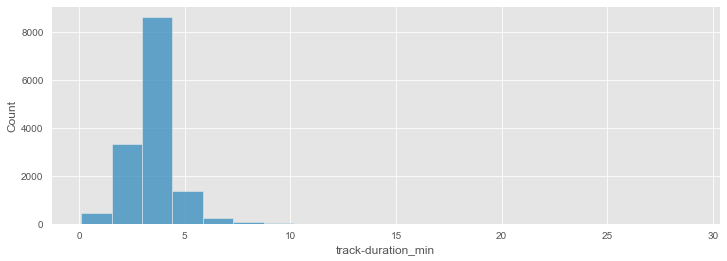

In [15]:
plt.figure(figsize=(12,4))
sns.histplot(data=dat, x='track-duration_min', bins=20)

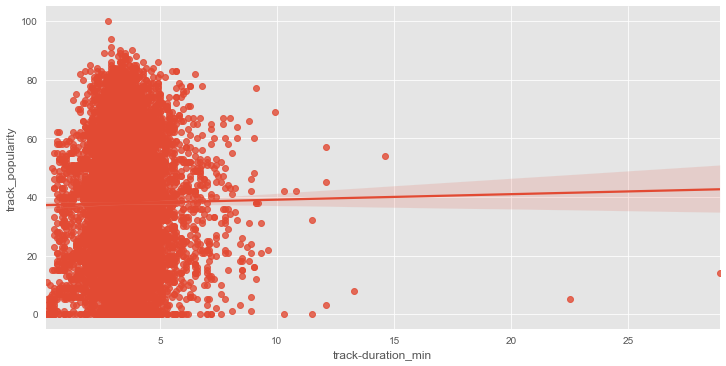

In [16]:
sns.lmplot(data=dat, x = 'track-duration_min', y = 'track_popularity', height = 5, aspect = 2)
plt.savefig('check2')

**Analyze Genre**

In [17]:
track_genre = dat.groupby(by='genre').count().sort_values(by='track_id', axis=0, ascending=True)['track_id']

<BarContainer object of 37 artists>

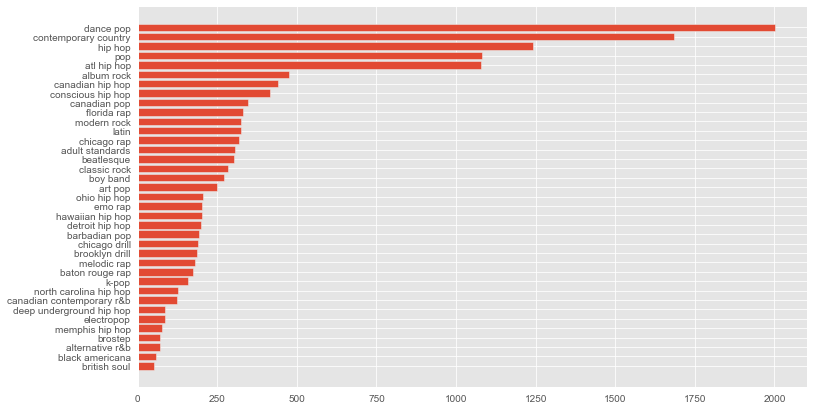

In [18]:
plt.figure(figsize=(12,7))
plt.barh(track_genre.index, track_genre.values)

In [19]:
#Limit genre types to 6
genres = ['hip hop', 'soul', 'rap', 'pop', 'r&b', 'rock', 'country', 'other']

In [20]:
def genre_types(genre, genre_types):
    for word in genre_types:
        if word in genre:
            return word
    return 'other'

In [21]:
dat['genres'] = dat['genre'].apply(lambda word:genre_types(word, genres))

In [22]:
track_genre = dat.groupby(by='genres').count().sort_values(by='track_id', axis=0, ascending=True)['track_id']

<BarContainer object of 8 artists>

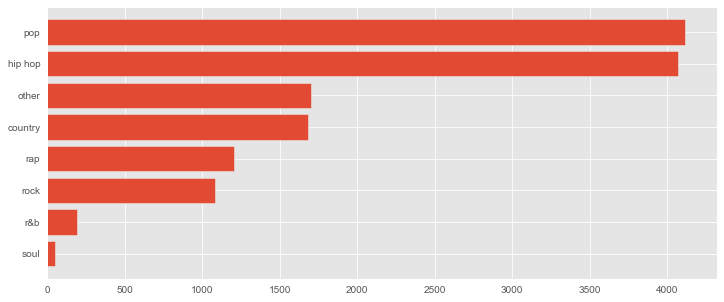

In [23]:
plt.figure(figsize=(12,5))
plt.barh(track_genre.index, track_genre.values)

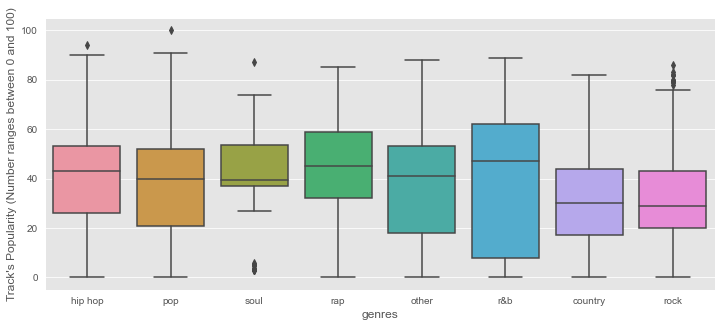

In [24]:
plt.figure(figsize = (12,5))
sns.boxplot(data = dat, x = 'genres', y = 'track_popularity')
plt.ylabel("Track's Popularity (Number ranges between 0 and 100)")
plt.savefig('check3')

Text(0, 0.5, "Track's Popularity (Number ranges between 0 and 100)")

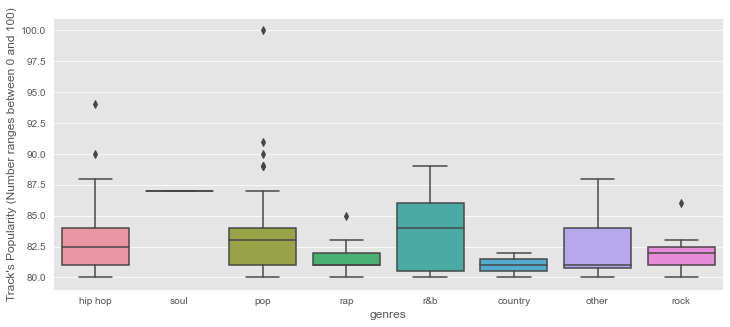

In [25]:
plt.figure(figsize = (12,5))
sns.boxplot(data = dat[dat['track_popularity'] >= 80] , x = 'genres', y = 'track_popularity')
plt.ylabel("Track's Popularity (Number ranges between 0 and 100)")

**Analyze Artist Popularity**

Text(0.5, 6.799999999999994, 'Artist Polularity')

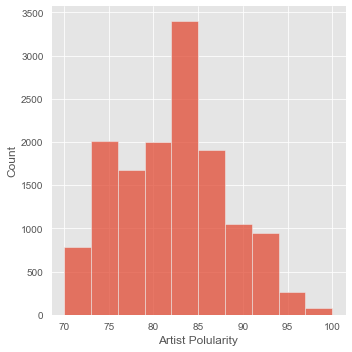

In [26]:
sns.displot(dat['artist_popularity'], bins = 10)
plt.xlabel('Artist Polularity')

<AxesSubplot:xlabel='genres', ylabel='artist_popularity'>

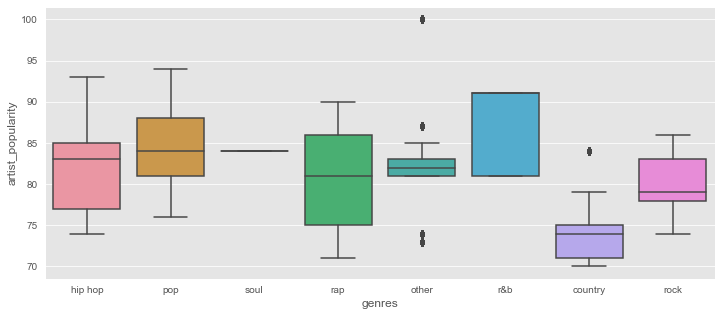

In [27]:
plt.figure(figsize = (12,5))
sns.boxplot(data = dat, x = 'genres', y = 'artist_popularity')

<AxesSubplot:xlabel='artist_popularity', ylabel='track_popularity'>

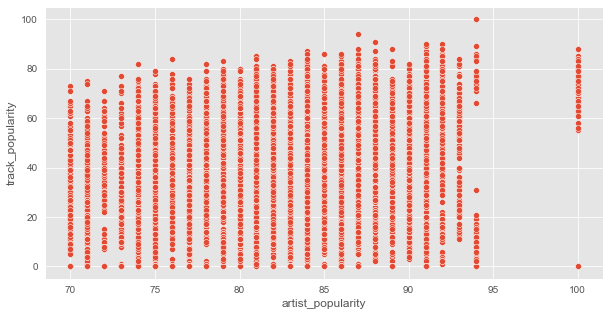

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = dat, x = dat['artist_popularity'], y = dat['track_popularity'])

In [29]:
track_pop_vs_art_pop_mean = dat.groupby('artist_popularity').mean()
track_pop_vs_art_pop_mean['Artist_Popularity'] = track_pop_vs_art_pop_mean.index

In [42]:
track_pop_vs_art_pop_mean.head()

,track_duration_sec,total_tracks,available_markets,track_popularity,track-duration_min,Artist_Popularity
artist_popularity,,,,,,
70,211319.201794,12.295964,175.130045,29.887892,3.525561,70
71,195883.377301,19.447853,163.042945,25.395706,3.265644,71
72,243251.741379,14.215517,167.568966,30.926724,4.051724,72
73,186422.348525,16.378016,174.643432,21.670241,3.107507,73
74,205606.295775,16.704225,151.294366,32.387324,3.426901,74


Text(9.549999999999994, 0.5, 'Mean Track Popularity')

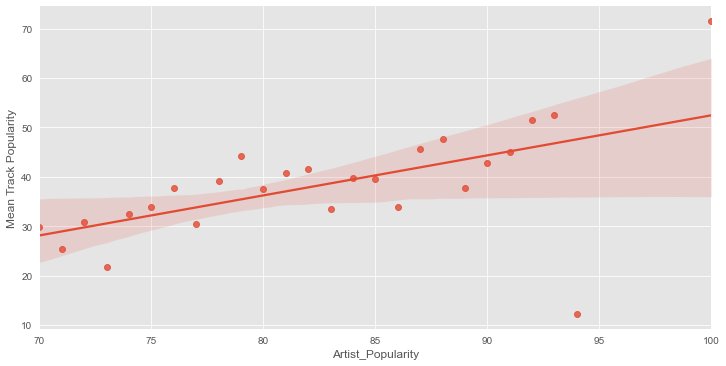

In [30]:
sns.lmplot(data = track_pop_vs_art_pop_mean, x = 'Artist_Popularity', y = 'track_popularity', height = 5, aspect = 2)
plt.ylabel("Mean Track Popularity")

In [31]:
track_pop_vs_art_pop_max = dat.groupby('artist_popularity').max()
track_pop_vs_art_pop_max['Artist_Popularity'] = track_pop_vs_art_pop_max.index

Text(3.9249999999999936, 0.5, 'Max Track Popularity')

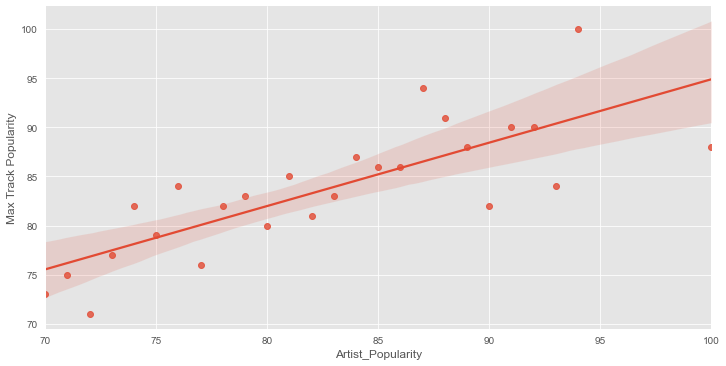

In [32]:
sns.lmplot(data = track_pop_vs_art_pop_max, x = 'Artist_Popularity', y = 'track_popularity', height = 5, aspect = 2)
plt.ylabel("Max Track Popularity")

**Analyze Track Release Date**

In [33]:
dat['release_date'] = pd.to_datetime(dat['release_date'])

In [34]:
dat['release_month'] = dat['release_date'].apply(lambda date_:date_.month)

<AxesSubplot:xlabel='release_month'>

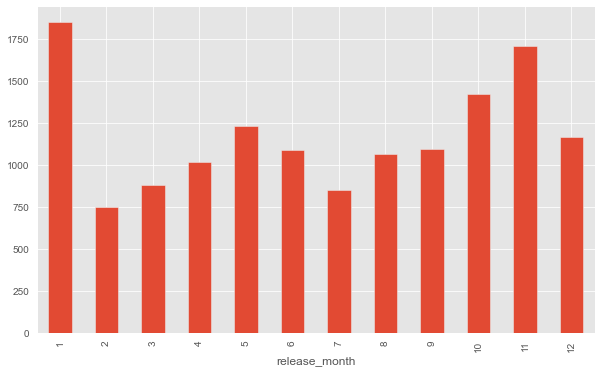

In [35]:
plt.figure(figsize = (10,6))
dat.groupby('release_month').count()['track_id'].plot(kind='bar')

In [36]:
track_pop_vs_release_months = dat.groupby(['genres','release_month']).count()['track_id'].unstack()

In [37]:
def replace_null_with_zero(cols):
    value = cols
    if pd.isnull(value):
        return 0
    else:
        return value

In [38]:
for col in track_pop_vs_release_months.columns:
  track_pop_vs_release_months[col] = track_pop_vs_release_months[col].apply(replace_null_with_zero)

Text(0.5, 34.0, 'Release Month')

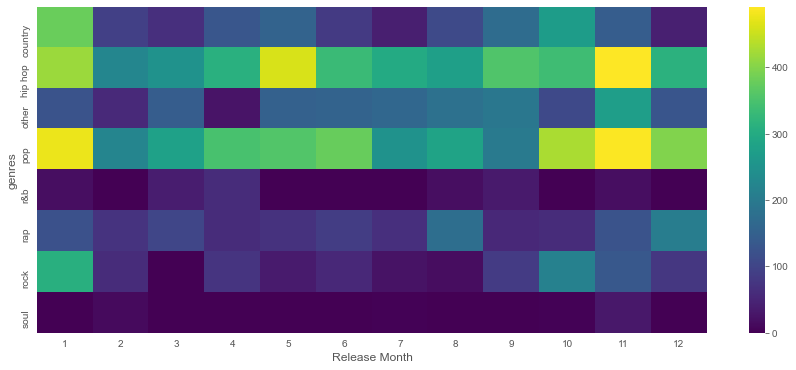

In [39]:
plt.figure(figsize=(15,6))
sns.heatmap(track_pop_vs_release_months, cmap='viridis')
plt.xlabel('Release Month')

In [40]:
def plot_genre_trend(df, metric):
    
    track_pop_vs_release_months = df.groupby(['genres','release_month']).max()[metric].unstack()
    
    for col in track_pop_vs_release_months.columns:
        track_pop_vs_release_months[col] = track_pop_vs_release_months[col].apply(replace_null_with_zero)
        
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12,12))
    df_index = 0

    for ax in axes:
        ax.plot(track_pop_vs_release_months.columns, track_pop_vs_release_months.iloc[df_index], 'purple', lw=1, marker = 'o')
        ax.set_ylabel(f'{track_pop_vs_release_months.index[df_index]}')
        df_index += 1
    ax.set_xlabel('Release Month')


    fig    
    plt.tight_layout()

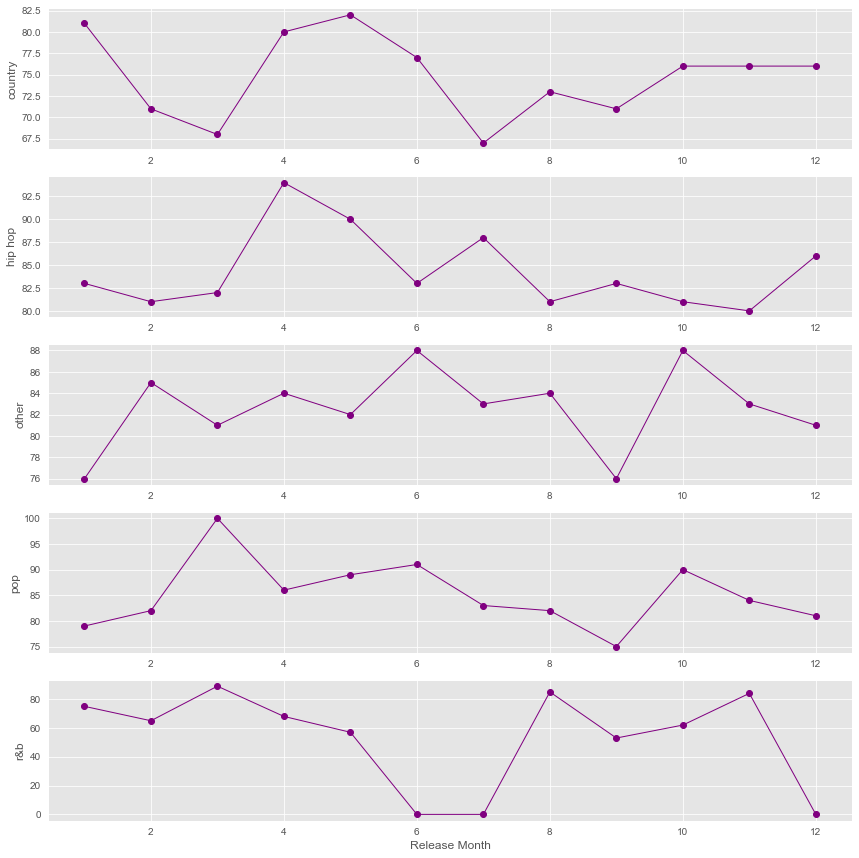

In [41]:
plot_genre_trend(dat, 'track_popularity')

In [43]:
def plot_genre_trend(df, metric):
    
    track_pop_vs_release_months = df.groupby(['genres','release_month']).mean()[metric].unstack()
    
    for col in track_pop_vs_release_months.columns:
        track_pop_vs_release_months[col] = track_pop_vs_release_months[col].apply(replace_null_with_zero)
        
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12,12))
    df_index = 0

    for ax in axes:
        ax.plot(track_pop_vs_release_months.columns, track_pop_vs_release_months.iloc[df_index], 'purple', lw=1, marker = 'o')
        ax.set_ylabel(f'{track_pop_vs_release_months.index[df_index]}')
        df_index += 1
    ax.set_xlabel('Release Month')


    fig    
    plt.tight_layout()

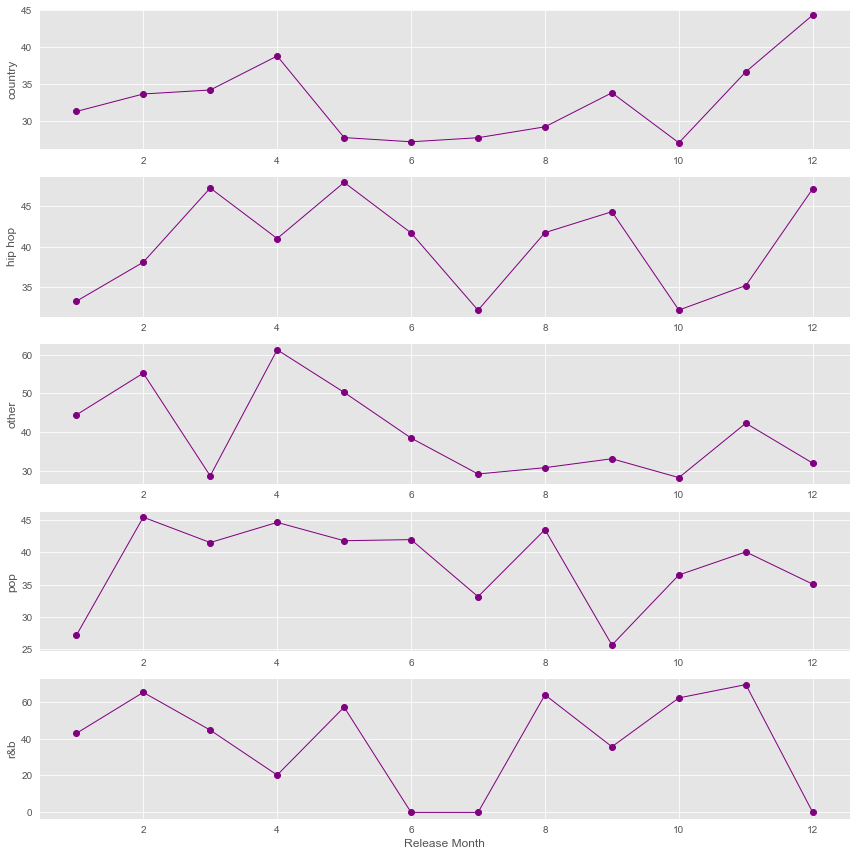

In [44]:
plot_genre_trend(dat, 'track_popularity')

In [ ]:
dat.to_excel("spotify_data.xlsx")